In [1]:
# Anuar Konkashbaev
# class DDS-8555 v1
# Assignment 1
import pandas as pd
from sklearn import datasets
iris= pd.DataFrame(datasets.load_iris().data)
iris.columns = datasets.load_iris().feature_names
iris['type'] = datasets.load_iris().target
iris['type']=iris['type'].astype('object') 
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
iris['new']=(iris.iloc[:,0]*iris.iloc[:,1])/(iris.iloc[:,2]*iris.iloc[:,3])

In [3]:
iris['new']

0      63.750000
1      52.500000
2      57.846154
3      47.533333
4      64.285714
         ...    
145     1.680602
146     1.657895
147     1.875000
148     1.697262
149     1.928105
Name: new, Length: 150, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split as tts 
X_train, X_test, y_train, y_test = tts(iris.iloc[:,0:3], iris.iloc[:,4], test_size=0.2, random_state=42,
stratify=iris.iloc[:,4]) 

In [5]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm)
8,4.4,2.9,1.4
106,4.9,2.5,4.5
76,6.8,2.8,4.8
9,4.9,3.1,1.5
89,5.5,2.5,4.0
...,...,...,...
37,4.9,3.6,1.4
2,4.7,3.2,1.3
33,5.5,4.2,1.4
52,6.9,3.1,4.9


In [6]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm)
38,4.4,3.0,1.3
127,6.1,3.0,4.9
57,4.9,2.4,3.3
93,5.0,2.3,3.3
42,4.4,3.2,1.3
56,6.3,3.3,4.7
22,4.6,3.6,1.0
20,5.4,3.4,1.7
147,6.5,3.0,5.2
84,5.4,3.0,4.5


In [7]:
y_train

8      0
106    2
76     1
9      0
89     1
      ..
37     0
2      0
33     0
52     1
3      0
Name: type, Length: 120, dtype: object

In [8]:
y_test

38     0
127    2
57     1
93     1
42     0
56     1
22     0
20     0
147    2
84     1
107    2
141    2
104    2
51     1
7      0
49     0
14     0
69     1
63     1
138    2
10     0
140    2
58     1
134    2
132    2
77     1
75     1
18     0
116    2
28     0
Name: type, dtype: object

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE 
from sklearn.metrics import mean_absolute_percentage_error as MAPE
def myf(y,yhat):
    ME=np.round(np.mean(y-yhat),3)
    MPE=np.round(np.mean((y-yhat)/y),3)
    myMAE=np.round(MAE(y,yhat),3)
    myMSE=np.round(MSE(y,yhat),3)
    myMAPE=np.round(MAPE(y,yhat),3)
    print("\n","ME:", np.round(ME,3),"\n","MPE:",MPE,"\n", "MAE:",  myMAE,"\n", "MSE:", myMSE,"\n","MAPE:",myMAPE)
est1=np.mean(X_train['petal length (cm)'])
est2=np.mean(X_train['sepal length (cm)']-X_train['petal length (cm)']) # I changed petal width to petal length, because original variable does not exist
est1=[est1]*len(y_test)
est2=[est2]*len(y_test)
print("est1: ")
myf(X_test['sepal width (cm)'],est1) 
print("est2: ")
myf(X_test['sepal width (cm)'],est2) 

est1: 

 ME: -0.677 
 MPE: -0.237 
 MAE: 0.694 
 MSE: 0.602 
 MAPE: 0.242
est2: 

 ME: 1.022 
 MPE: 0.32 
 MAE: 1.022 
 MSE: 1.188 
 MAPE: 0.32


In [10]:
from sklearn.metrics import confusion_matrix as cm, ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report as cr
import matplotlib.pyplot as plt
from numpy import percentile
est3=percentile(X_train['sepal length (cm)'], [25, 50])
y_hat=np.zeros(len(y_test))
y_hat[X_test['sepal length (cm)']>est3[0]]=1
y_hat[X_test['sepal length (cm)']>est3[1]]=2
y_hat=y_hat.astype('int')
print(cr(y_test.astype('int'),y_hat)) 
est4=percentile(X_train['sepal length (cm)'], [50,75]) 
y_hat2=np.zeros(len(y_test)) 
y_hat2[X_test['sepal length (cm)']>est4[0]]=1 # I changed est3 to est4
y_hat2[X_test['sepal length (cm)']>est4[1]]=2 # I changed est3 to est4
y_hat2=y_hat2.astype('int') 
print(cr(y_test.astype('int'),y_hat2))


              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.33      0.20      0.25        10
           2       0.59      1.00      0.74        10

    accuracy                           0.57        30
   macro avg       0.55      0.57      0.53        30
weighted avg       0.55      0.57      0.53        30

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.38      0.30      0.33        10
           2       0.67      0.60      0.63        10

    accuracy                           0.60        30
   macro avg       0.58      0.60      0.58        30
weighted avg       0.58      0.60      0.58        30



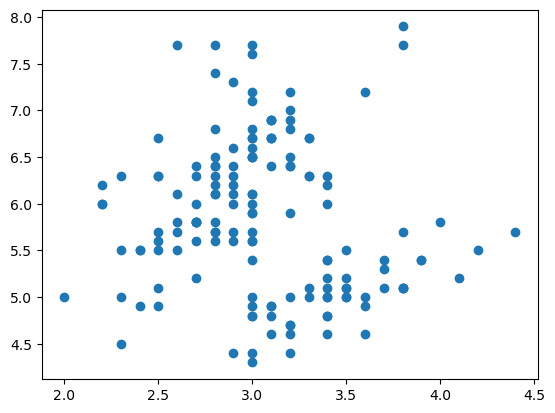

In [11]:
plt.scatter(iris['sepal width (cm)'],iris['sepal length (cm)'])

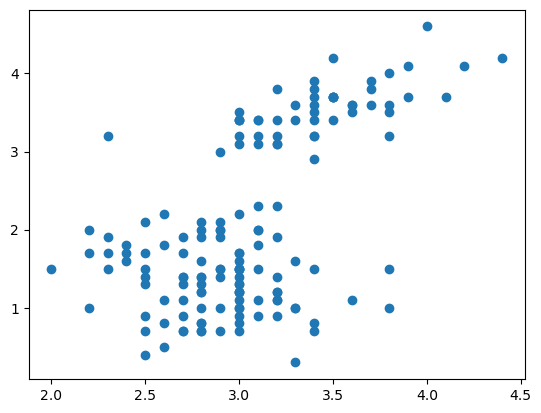

In [12]:
plt.scatter(iris['sepal width (cm)'],iris['sepal length (cm)']-iris['petal length (cm)'])

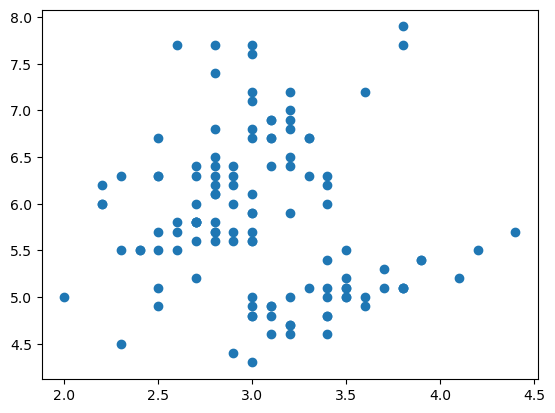

In [13]:
plt.scatter(X_train['sepal width (cm)'],X_train['sepal length (cm)'])

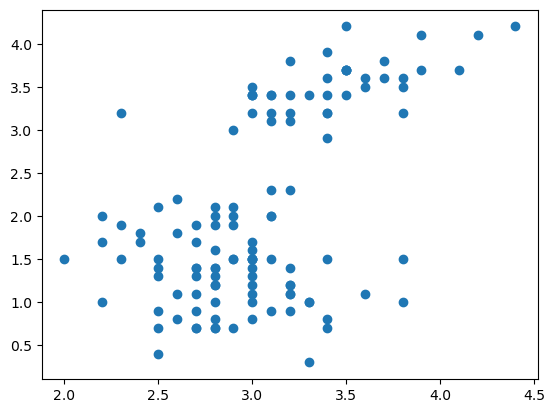

In [14]:
plt.scatter(X_train['sepal width (cm)'],X_train['sepal length (cm)']-X_train['petal length (cm)'])

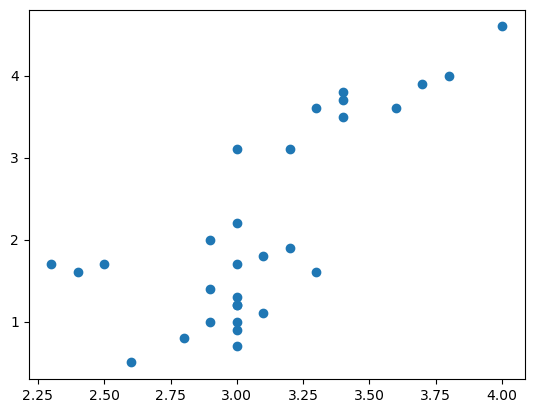

In [15]:
plt.scatter(X_test['sepal width (cm)'],X_test['sepal length (cm)']-X_test['petal length (cm)'])